# Introduction

## 1. Business Understanding

### a) Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office.

**Problem Statement:**

Translate the findings into actionable insights which the head of Microsoft's new movie studio can use to help decide what type of films to create.

### b) Main Objective

Find the type of films that are currently doing better at the Box Office and use the data to help create a new movie studio

### c) Other Objectives

1. Determine the relationships between genres and various variables such as rating, gross, and numbers of votes.

2. Determine the relationships between the title and various variables such as rating, gross, and the number of votes.

3. Determine how average rating and number of votes will affect movies to be produced

## 1.2 Data Understanding

The dataset used for this anaysis was downloaded from different box offices. The data was was acquired from ***Box Office MojoLinks, IMDB, Rotten Tomatoes, TheMovieDB, The Numbers.*** The data contains information about movies that have posted in box offices. The data has two files: idmb movie ratings and basics and boom movies gross .The whole  combined data has 2447 rows and 12 columns.The data has the following set of information about movie:

1. movie_id:         This is the primary key used to identifies all movies  
2. primary_title:    This is the original movie title the movie was given
3. start_year:       This is the year the movie started production   
4. runtime_minutes:  This is the count of minutes in each movie   
5. genres:           This is the the classification of the movie
6. averagerating:    This is the rating collected over the continent from viewers
7. numvotes:         This is the number of people who voted the movies and their count was used to generate ratings   
8. title:            This is the title the movie was produced with
9. studio:           This is the studio in which each movie was produced    
10. domestic_gross:   This is the amount of money collected from each sell of movies in the country of origin    
11. foreign_gross:    This is the amount of money collected from each sell of movies in the country of origin    
12. year:             This is the year the movie was produced   

###  Requirements

**1. Data Preparation**
- Loading Libraries
- Loading data
- Descriptive Exploration
- Data Cleaning
- Exploratory Descriptive Analysis (EDA)
- Pre-processing Data

**2. Conclusion**

**3. Recommendation**

## 2.Loading Data

### Loading Relevant Libraries

In [1]:
# Loading the imports
import pandas as pd
import numpy as np
import sqlite3
import csv
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

In [28]:
# creating a connection to the database.
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [29]:
# Showing all tables in idm.db.
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()


In [30]:
# display movie_basics table.
df_imdb = pd.read_sql("""
SELECT *
  FROM movie_basics
  JOIN movie_ratings
      USING (movie_id);
""", conn)

In [31]:
# opening csv file
df_gross = pd.read_csv("bom.movie_gross.csv")

## 3.Understanding Data

In [32]:
# Checking the IMDB dataframe.
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [33]:
# Check the column names of the IMDB dataframe.
df_imdb_cols = df_imdb.columns
df_imdb_cols

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [34]:
# Checking the MOVIE_GROSS dataframe.
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [35]:
# Check the column names of the MOVIE_GROSS dataframe.
df_gross_cols = df_gross.columns
df_gross_cols

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

### Merging the Two DataFrames

In [36]:
#Creating a common columns between the two DataFrames.
df_imdb["title"] = df_imdb["original_title"] # Renaming the title column.
df_imdb.drop("original_title", axis= 1, inplace = True)


In [38]:
#Merge the two DataFrames.
df_merge = pd.merge(df_imdb, df_gross, on = "title")
df_merge.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


#### Observation

In [40]:
# Checking dataframe shape.
df_merge.shape

(2447, 12)

In [41]:
# Check Column names in the dataframe.
df_merge.columns

Index(['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'title', 'studio', 'domestic_gross',
       'foreign_gross', 'year'],
      dtype='object')

In [42]:
# Check df_merge information.
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2447 non-null   object 
 1   primary_title    2447 non-null   object 
 2   start_year       2447 non-null   int64  
 3   runtime_minutes  2402 non-null   float64
 4   genres           2443 non-null   object 
 5   averagerating    2447 non-null   float64
 6   numvotes         2447 non-null   int64  
 7   title            2447 non-null   object 
 8   studio           2444 non-null   object 
 9   domestic_gross   2429 non-null   float64
 10  foreign_gross    1573 non-null   object 
 11  year             2447 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 248.5+ KB


In [43]:
# Check for total missing values in each row in the dataset.
df_merge.isna().sum()

movie_id             0
primary_title        0
start_year           0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
title                0
studio               3
domestic_gross      18
foreign_gross      874
year                 0
dtype: int64

In [44]:
# Check mathematical statistical view of dataframe.
df_merge.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,2447.000000,2402.000000,2447.000000,2.447000e+03,2.429000e+03,2447.000000
mean,2013.774418,106.810575,6.406293,7.273033e+04,3.612440e+07,2014.001635
std,2.496398,20.061202,1.045029,1.345874e+05,6.952373e+07,2.464797
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.800000,3.776000e+03,3.020000e+05,2012.000000
50%,2014.000000,104.000000,6.500000,2.074600e+04,5.100000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,8.063900e+04,4.300000e+07,2016.000000
max,2019.000000,186.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [45]:
#Check for duplicted values
df_merge.duplicated().sum()

0

## 4. Data Cleaning

To use data for modelling, I will have to employ data cleaning methods to make it ready and suitable. Methods to be employed are :


### a) Completeness

In [47]:
#Function used for checking missing values
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)*100).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_values(df_merge)


,Missing Values,Percentage(%)
foreign_gross,874,35.717205
runtime_minutes,45,1.838987
domestic_gross,18,0.735595
genres,4,0.163465
studio,3,0.122599


#### Dropping missing Data

Since `genres` column is vital in our dataset and only has 4 missing values we will only delete the rows with missing values.

In [48]:
#Only drop the missing rows
df_merge = df_merge.dropna(subset = ["genres"])
missing_values(df_merge)

,Missing Values,Percentage(%)
foreign_gross,874,35.775686
runtime_minutes,43,1.760131
domestic_gross,18,0.736799
studio,3,0.122800


Since `foreign_gross` column is vital in our dataset we will only delete the rows with missing values

In [49]:
df_merge = df_merge.dropna(subset = ["foreign_gross"])
missing_values(df_merge)

,Missing Values,Percentage(%)
runtime_minutes,34,2.166985
domestic_gross,18,1.147228
studio,2,0.127470


Since `domestic_gross` column has 1 percentage missing we will only delete the rows with missing values

In [52]:
# Dropping missing values from the domestic gross column.
df_merge = df_merge.dropna(subset = ["domestic_gross"])

In [53]:
# Dropping missing values from the studio column
df_merge = df_merge.dropna(subset = ["studio"])

In [54]:
# Dropping missing values from the runtime_minutes
df_merge = df_merge.dropna(subset = ["runtime_minutes"])

In [55]:
#Confirm that all the null values have been dropped
df_merge.isna().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

### b) Uniformity

The next aspect to look into is the uniformity of the data. This check will include looking at the data types of the different columns and ensuring they are are correct.

In [57]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1517 non-null   object 
 1   primary_title    1517 non-null   object 
 2   start_year       1517 non-null   int64  
 3   runtime_minutes  1517 non-null   float64
 4   genres           1517 non-null   object 
 5   averagerating    1517 non-null   float64
 6   numvotes         1517 non-null   int64  
 7   title            1517 non-null   object 
 8   studio           1517 non-null   object 
 9   domestic_gross   1517 non-null   float64
 10  foreign_gross    1517 non-null   object 
 11  year             1517 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 154.1+ KB


The columns `foreign_gross` has the data types object. This needs to be converted to a date-type data type.

In [58]:
# converting the column's data type
def replace_data(data, to_replace, value, col):
    """replace values in the given column"""
    data[col].replace(to_replace, value,inplace = True, regex = True)
replace_data(df_merge, ",", "", "foreign_gross")

df_merge["foreign_gross"] = df_merge["foreign_gross"].astype(float)

### c) Validity

Some columns are not important, hence can be dropped, so as to remain with only the necessary columns. `runtime_minutes` can be dropped since it shows the minutes in a movie, other columns are duplicated of other so we will drop one of the column and remain with the other.

In [59]:
# Dropping the start_year and the primary_title columns
df_merge.drop(columns = ["start_year", "primary_title"], inplace = True)

In [60]:
# Make movie_id to be the index of the dataframe.
df_merge.set_index("movie_id", inplace = True)
df_merge.head()

,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
movie_id,,,,,,,,,
tt0337692,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
tt4339118,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012
tt5647250,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012
tt0359950,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
tt0365907,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014


## 5. Exploratory Data Analysis(EDA)

### a) Grouping the Dataset
I assumed that movies with the rate of eight(8) or any rate above are considered as a higly rated movies since maximum rate is 10

In [61]:
highly_rated_movies = df_merge[df_merge['averagerating']>=8]
highly_rated_movies.head()

,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
movie_id,,,,,,,,,
tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,BV,415000000.0,652000000.0,2010
tt9906218,84.0,Documentary,8.1,8,Unstoppable,Fox,81600000.0,86200000.0,2010
tt0790636,117.0,"Biography,Drama",8.0,402462,Dallas Buyers Club,Focus,27300000.0,27900000.0,2013
tt0816692,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,489400000.0,2014
tt0892769,98.0,"Action,Adventure,Animation",8.1,611299,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [62]:
highly_rated_movies.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,66.000000,66.000000,6.600000e+01,6.600000e+01,6.600000e+01,66.000000
mean,118.121212,8.237879,3.874813e+05,1.154779e+08,1.865852e+08,2013.848485
std,29.523141,0.276664,4.060138e+05,1.333786e+08,2.009228e+08,2.741378
min,45.000000,8.000000,6.000000e+00,2.630000e+04,1.369500e+03,2010.000000
25%,103.000000,8.000000,6.450000e+02,1.325000e+07,1.572500e+07,2011.000000
50%,114.500000,8.100000,3.552880e+05,7.440000e+07,1.086000e+08,2014.000000
75%,138.750000,8.400000,6.206452e+05,1.665500e+08,2.768250e+08,2016.000000
max,180.000000,9.200000,1.841066e+06,6.788000e+08,6.872000e+08,2018.000000


### Relation between movie title and the number of people watching the movie

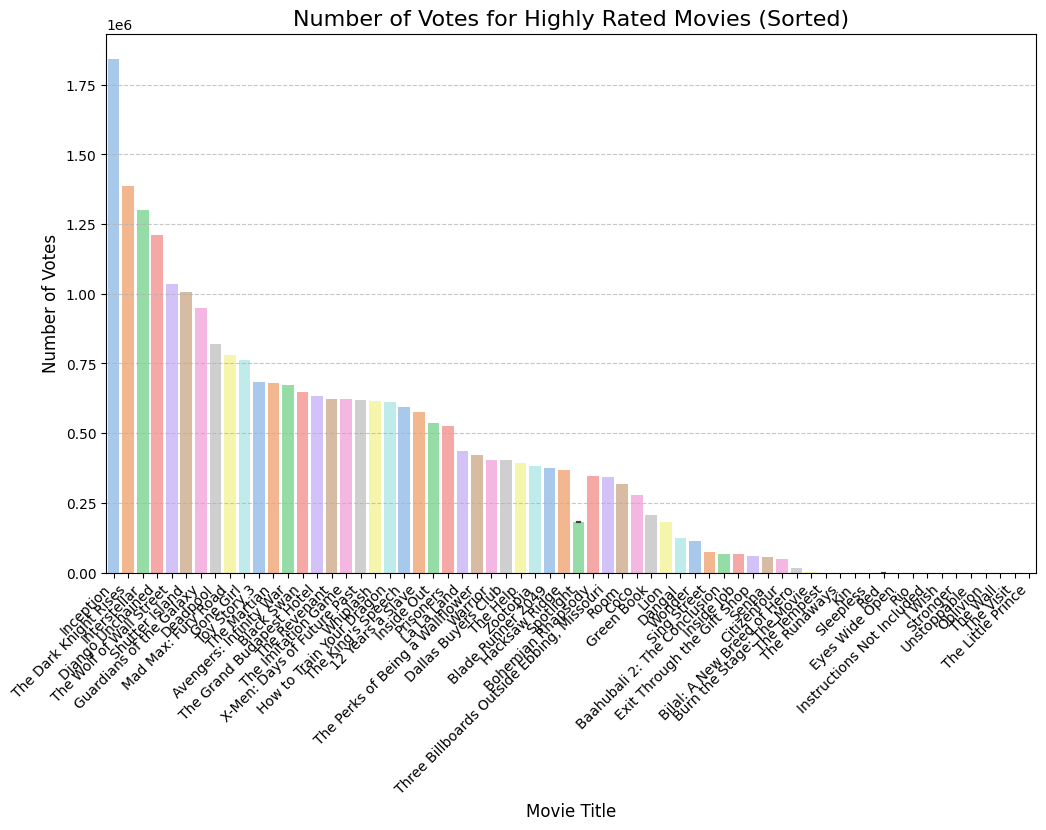

In [80]:
# Sort the DataFrame by 'numvotes' column in descending order
sorted_movies = highly_rated_movies.sort_values(by='numvotes', ascending=False)

# Create the bar plot
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x="title", y="numvotes", data=sorted_movies, ci=False, capsize=0.2, errwidth=1.5, palette="pastel", dodge=True, saturation=0.8, width=0.8)

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Set labels and title
ax.set_xlabel("Movie Title", fontsize=12)
ax.set_ylabel("Number of Votes", fontsize=12)
plt.title("Number of Votes for Highly Rated Movies (Sorted)", fontsize=16)

# Adjust tick parameters
plt.xticks(rotation=45, ha="right")
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

# Show the plot
plt.show()

### Does foreign gross affect number of people watching movie by  title across the years ?

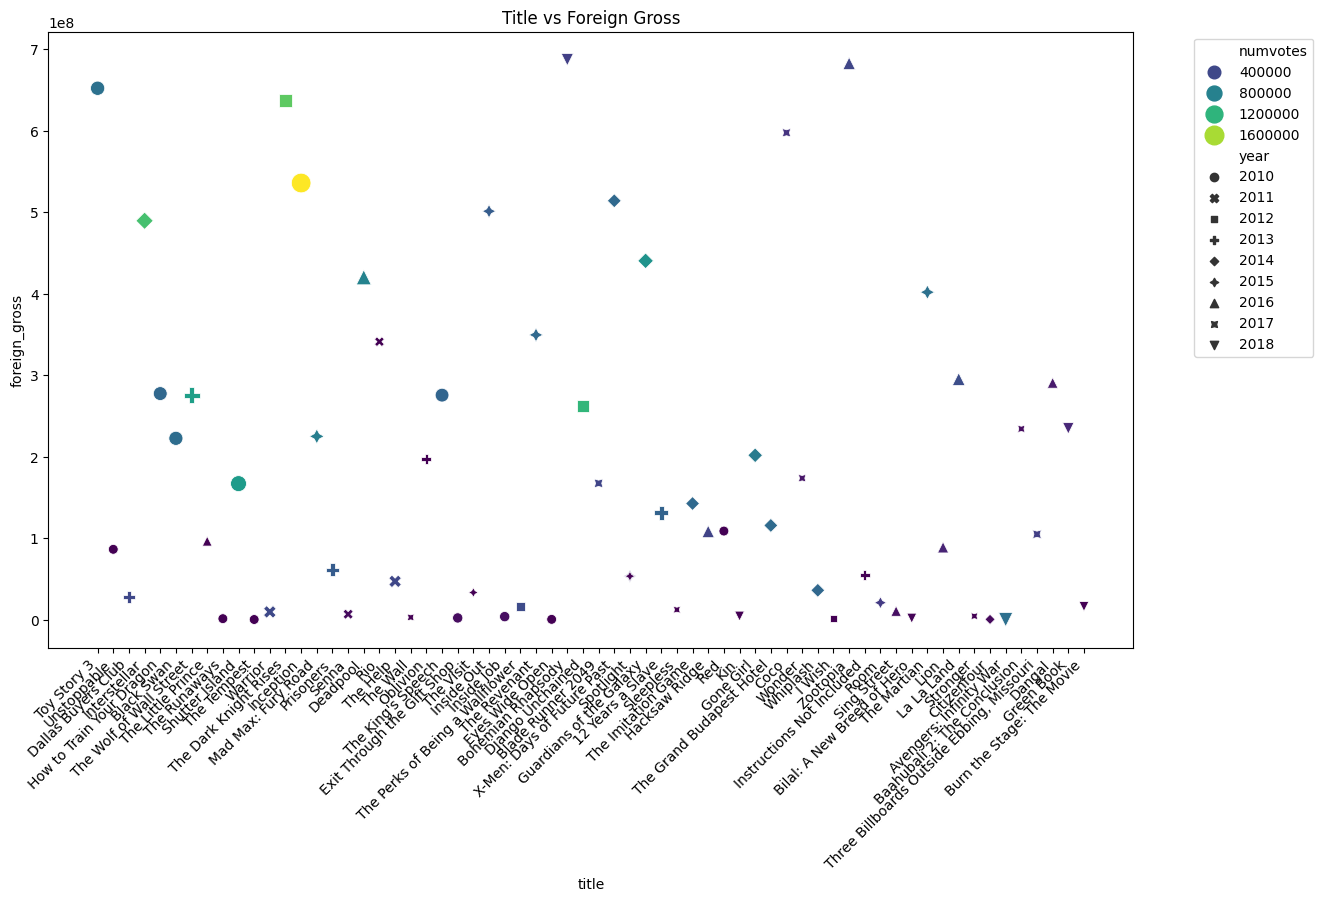

In [81]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x="title", y="foreign_gross", data=highly_rated_movies,
                hue="numvotes", style="year",
                size="numvotes", palette="viridis", sizes=(50, 200))

plt.title("Title vs Foreign Gross")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement

plt.show()

### Relationship between movie titles and amount collected from foreign countries

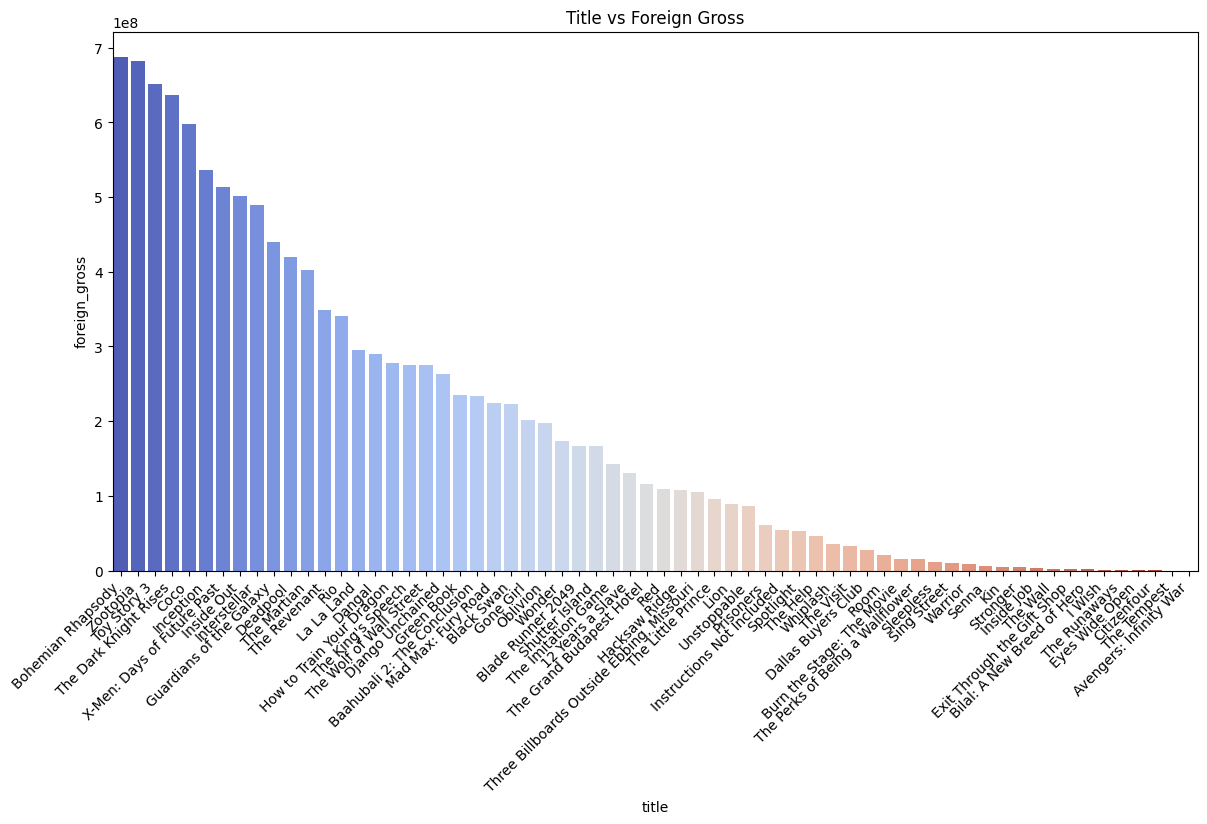

In [76]:
# Sort the DataFrame by 'foreign_gross' column in descending order
sorted_highly_rated_movies = highly_rated_movies.sort_values(by='foreign_gross', ascending=False)

# Increase figure size for better visibility
plt.figure(figsize=(14, 7))

# Create the bar plot with sorted data
sns.barplot(x="title", y="foreign_gross", data=sorted_highly_rated_movies, ci=False, palette="coolwarm")

plt.title("Title vs Foreign Gross")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.show()

### Relation of movie titles and amount collected from own country

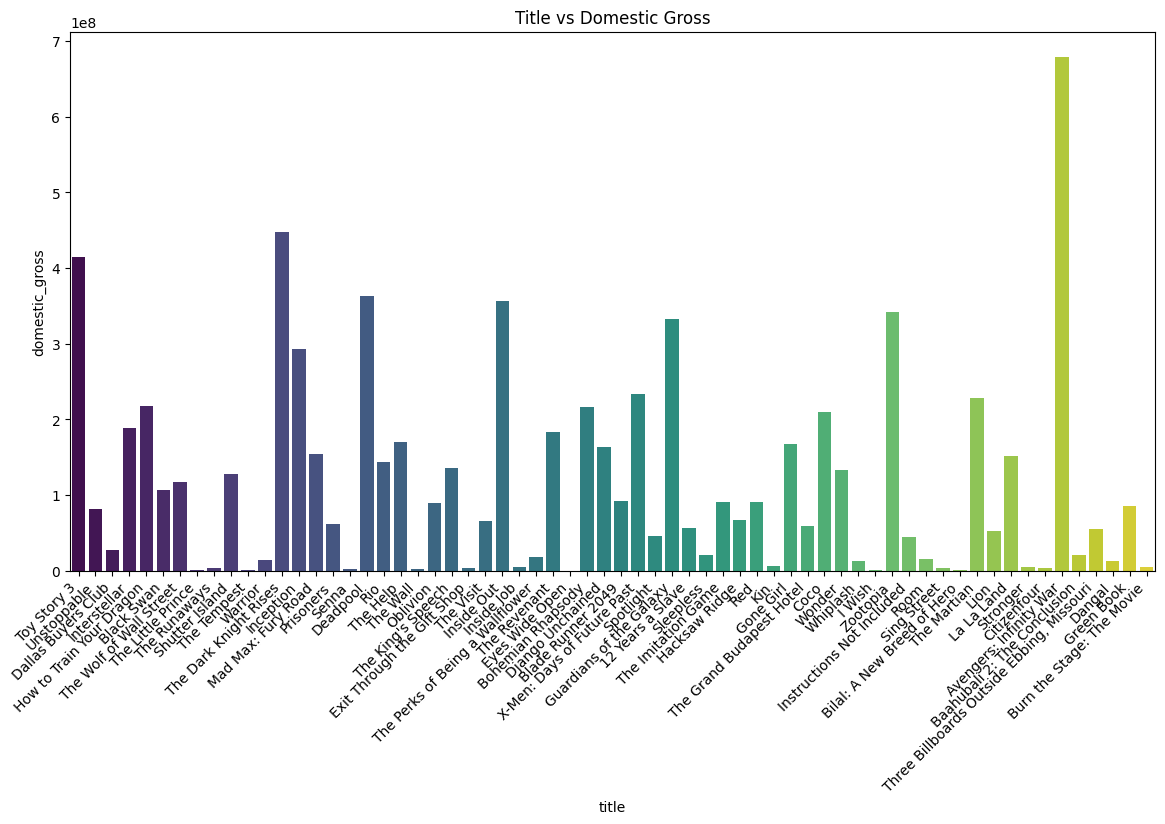

In [78]:
plt.figure(figsize=(14, 7))

sns.barplot(x="title", y="domestic_gross", data=highly_rated_movies, ci=False, palette="viridis")  # Adjust the color palette as needed

plt.title("Title vs Domestic Gross")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.show()

###  Relation between `genres` and the number of people watching the movie

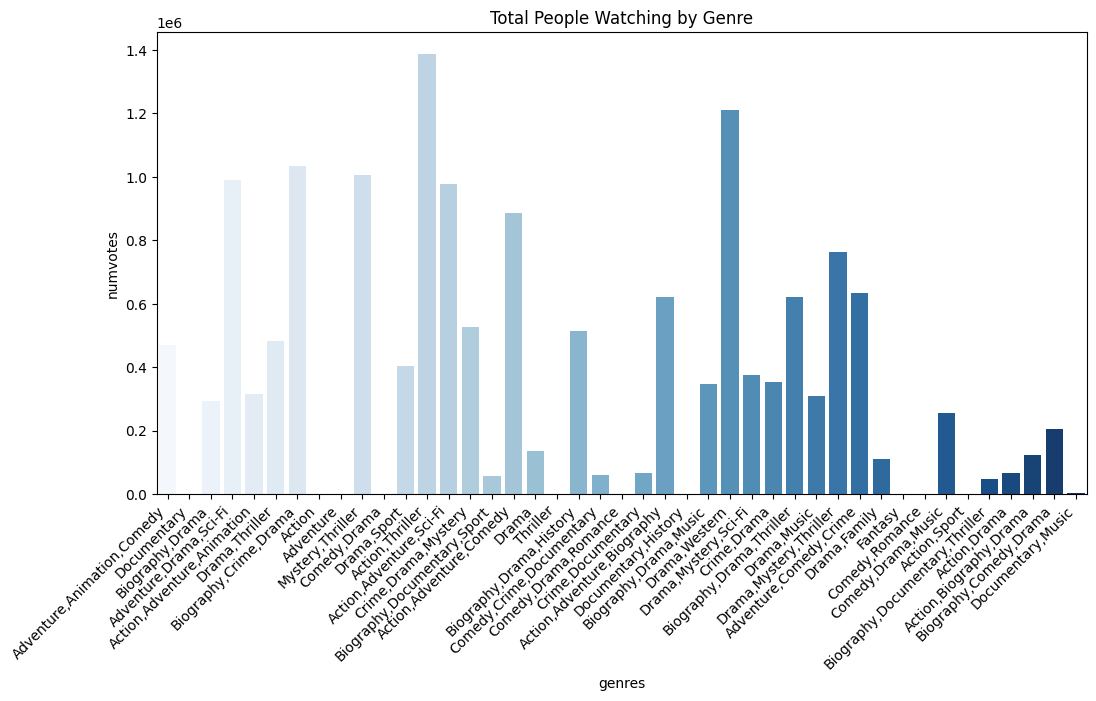

In [79]:
plt.figure(figsize=(12, 6))

sns.barplot(x="genres", y="numvotes", data=highly_rated_movies, ci=False, palette="Blues")  # Adjust the color palette as needed

plt.title("Total People Watching by Genre")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.show()

### Does rating affect number of people watching movie by `genres` across the years ?

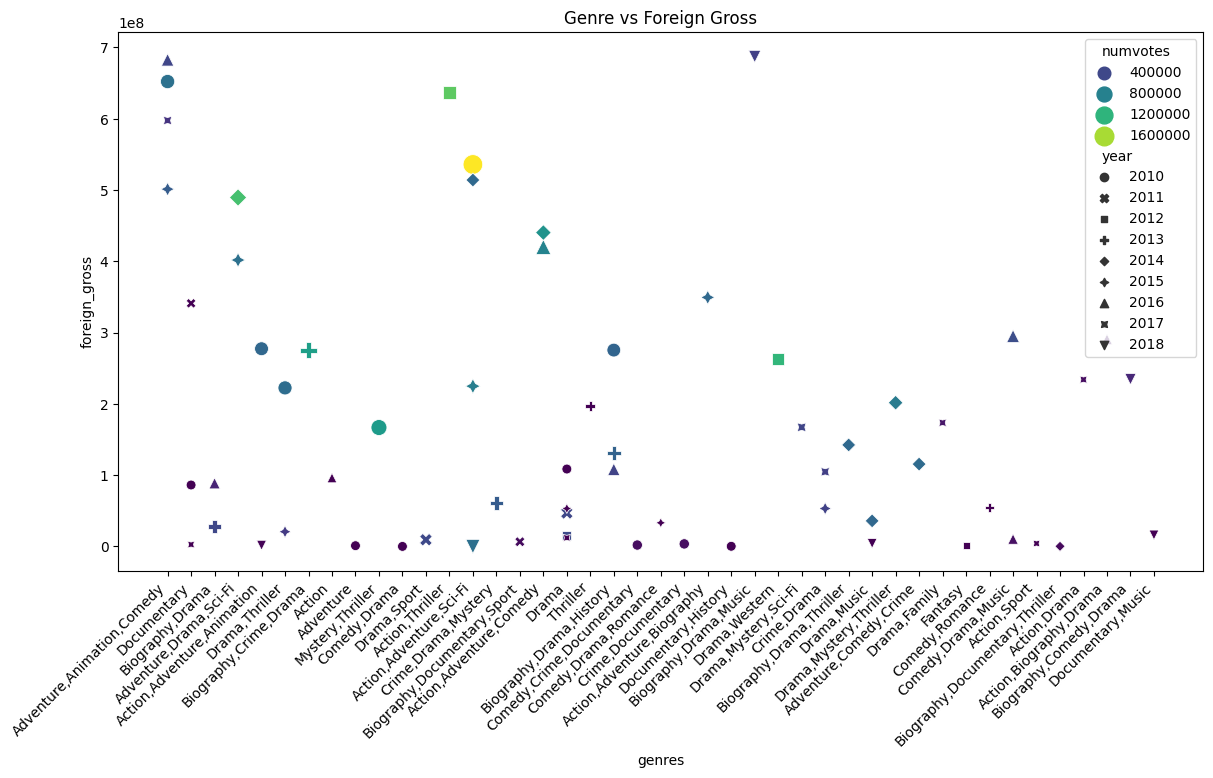

In [82]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x="genres", y="foreign_gross", data=highly_rated_movies,
                hue="numvotes", style="year",
                size="numvotes", palette="viridis", sizes=(50, 200))
plt.title("Genre vs Foreign Gross")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

### Relation of movie `genres` and amount collected from foreign contries

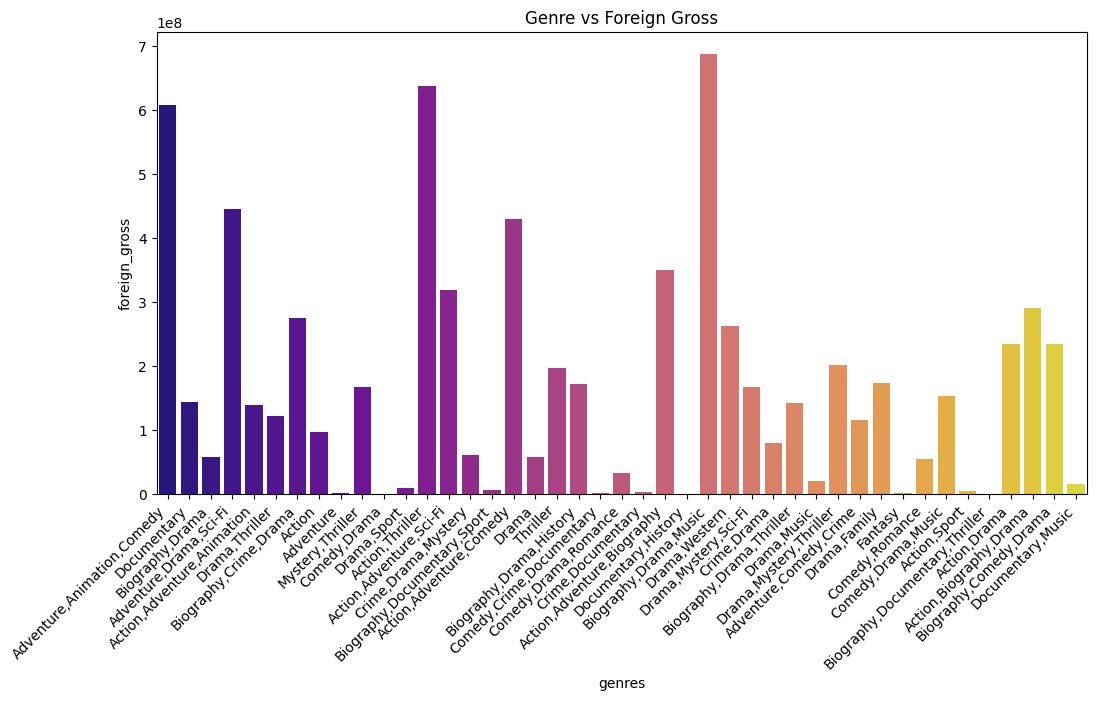

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x="genres", y="foreign_gross", data=highly_rated_movies, ci=False, palette="plasma")  # Adjust the color palette as needed
plt.title("Genre vs Foreign Gross")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

### Relation of movie `genres` and amount collected from own country

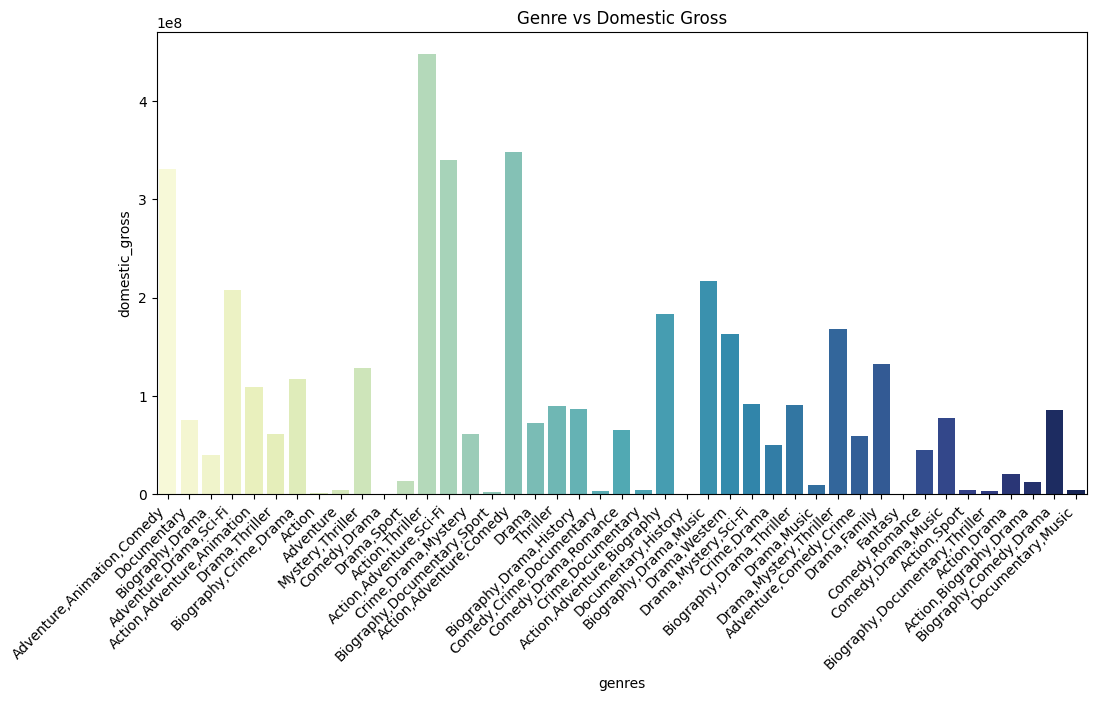

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x="genres", y="domestic_gross", data=highly_rated_movies, ci=False, palette="YlGnBu")  # Adjust the color palette as needed
plt.title("Genre vs Domestic Gross")
plt.xticks(rotation=45, ha="right")


### Conclusion


* Interception is the highest watched movie and was acted on 2010.

* Bohemian Rhapsody is the highest selling movie internationaly.

* Avengers infinity is the was highest selling movie locally.

* The best genre of movie that is liked by a alot of people in general is an  action, adventure, Sci-Fi based movie.

* Action, thriller genres are highly watched movies.

* Biography, Drama, Music is the most selling genre internationally.







### Recommendations.

I would recommend that the managers should produce movies that relate to a combination of the following:
1. *Adventure, Animation, Comedy, Action, Thriller and biography, Drama and music movie genres* for foreign countries because they have the highest selling rates in foreign countries.

2. The managers should concentrate on the International market for gross collected.

3. Action, adventure sci-fi movies have the highest number of people watching them locally and in foreign countries and thus should be given a priority.

4. Adventure, drama, sci-fi movies, action thrillers, and western drama are the highest-watched genres.